In [1]:
import phoebe
from phoebe import u, c

import numpy as np

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[2].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
import analisis.phoebe_model.optimizers.opt_utils as opt_utils
importlib.reload(gen_utils)
importlib.reload(opt_utils)

logger = phoebe.logger(clevel='WARNING')

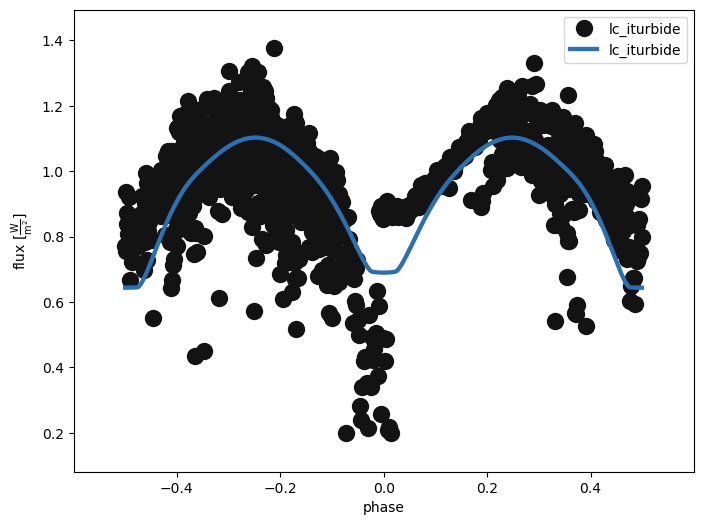

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [2]:
b = phoebe.load("../bundle-saves/rotsei1-estimates")
b.plot(x='phase', dataset='lc_iturbide', show=True, legend=True)

In [3]:
print(b['requiv'])
print(b['sma@binary'])
print(b['requivsumfrac'])

ParameterSet: 4 parameters
C        requiv@primary@component: 1.6410086487444842 solRad
C      requiv@secondary@component: 1.0401643607916269 solRad
        requiv@primary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 1)
      requiv@secondary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
Parameter: sma@binary@component
                       Qualifier: sma
                     Description: Semi-major axis of the orbit (defined at time t0@system)
                           Value: 3.35 solRad
                  Constrained by: 
                      Constrains: asini@binary@component, requiv@primary@component, requiv@secondary@component, requivratio@binary@component, requivsumfrac@binary@component, mass@primary@component, sma@primary@component, asini@primary@component, requiv_max@primary@component, requiv_min@primary@component, mass@secondary@componen

In [4]:
b.flip_constraint(qualifier='requivsumfrac', solve_for='sma@binary')

<ConstraintParameter: {sma@binary@component} = ({requiv@primary@component} + {requiv@secondary@component}) / {requivsumfrac@binary@component} (solar units) => 3.35 solRad>

In [5]:
gen_utils.avoidAtmosphereErrors(b)
opt_utils.optimize_params(b, ['t0_supconj'], 'rotsei1_t0', True)
# opt_utils.optimize_params(b, ['t0_supconj'], 'rotsei1_t0', False, maxiter=50)

  0%|          | 0/50 [00:00<?, ?it/s]Fri, 14 Jul 2023 18:38 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
Fri, 14 Jul 2023 18:39 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
Fri, 14 Jul 2023 18:41 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
Fri, 14 Jul 2023 18:42 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
  4%|▍         | 2/50 [06:04<2:25:45, 182.20s/it]Fri, 14 Jul 2023 18:44 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
Fri, 14 Jul 2023 18:45 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
  6%|▌         | 3/50 [09:09<2:23:34, 183.28s/it]Fri, 14 Jul 2023 18:47 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc

('opt_rotsei1_t0', 'opt_rotsei1_t0_solution')

t0_supconj@binary@orbit@component = -0.01 d


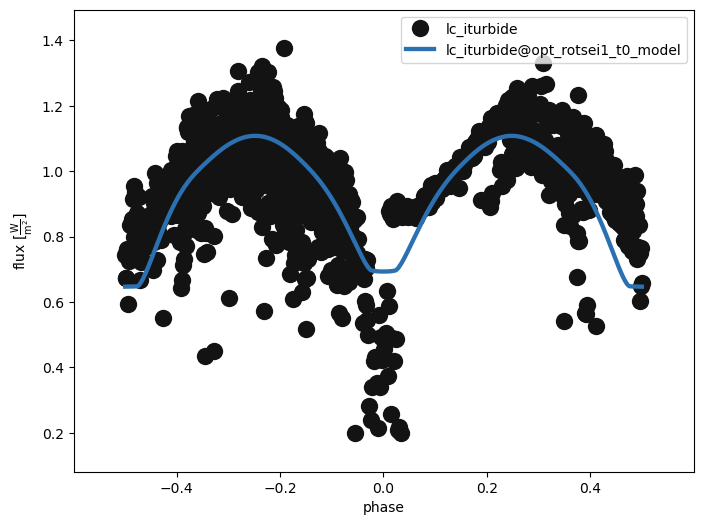

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [7]:
gen_utils.avoidAtmosphereErrors(b)
# opt_utils.adopt_solution(b, 'rotsei1_t0', "./results/opt_rotsei1_t0_solution", compute='fast_compute')
opt_utils.adopt_solution(b, 'rotsei1_t0', compute='fast_compute')
gen_utils.printFittedVals(b, 'opt_rotsei1_t0_solution')
b.plot(model='opt_rotsei1_t0_model', kind='lc', x='phase', show=True, legend=True)

In [9]:
gen_utils.resetAtmosphere(b)
# opt_utils.optimize_params(b, ['incl@binary'], 'rotsei1_incl', True, compute='phoebe01')
opt_utils.optimize_params(b, ['incl@binary'], 'rotsei1_incl', False, maxiter=50, compute='phoebe01')

# gen_utils.avoidAtmosphereErrors(b)
# opt_utils.optimize_params(b, ['incl@binary'], 'rotsei1_incl', False, maxiter=50, compute='fast_compute')

  2%|▏         | 1/50 [00:36<30:04, 36.82s/it]
Mon, 17 Jul 2023 19:05 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
Mon, 17 Jul 2023 19:07 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
Mon, 17 Jul 2023 19:09 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
Mon, 17 Jul 2023 19:11 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
  4%|▍         | 2/50 [08:09<3:15:39, 244.57s/it]Mon, 17 Jul 2023 19:12 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
Mon, 17 Jul 2023 19:14 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'
  6%|▌         | 3/50 [11:23<2:55:17, 223.78s/it]Mon, 17 Jul 2023 19:15 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for da

('opt_rotsei1_incl', 'opt_rotsei1_incl_solution')

incl@binary@orbit@component = 67.34 deg


ParameterSet: 1 parameters
            incl@binary@component: 84.35 deg


100%|██████████| 1193/1193 [02:12<00:00,  8.98it/s]
Mon, 17 Jul 2023 20:24 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009729575622188373 for dataset='lc_iturbide'


Plotting


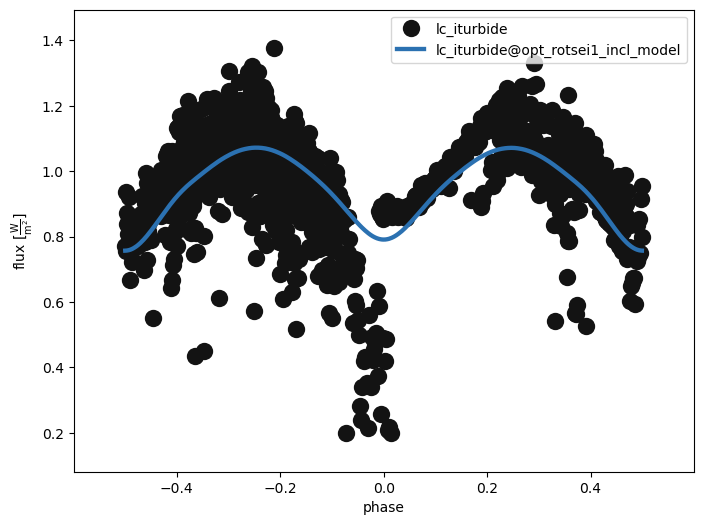

In [10]:
# gen_utils.resetAtmosphere(b)
# opt_utils.adopt_solution(b, 'rotsei1_incl', "./external-jobs/results/opt_rotsei1_incl_solution", compute='phoebe01')

gen_utils.avoidAtmosphereErrors(b)
opt_utils.adopt_solution(b, 'rotsei1_incl', compute='phoebe01')

In [18]:
gen_utils.resetAtmosphere(b)
opt_utils.optimize_params(b, ['t0_supconj', 'incl@binary'], 'rotsei1_t0_porb', True, compute='phoebe01')

Wed, 12 Jul 2023 23:47 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.


External Solver: ./external-jobs/optimizer.nelder_mead_opt_t0_porb.py ./results/opt_t0_porb_solution


('opt_t0_porb', 'opt_t0_porb_solution')

t0_supconj@binary@orbit@component = -0.01 d
period@binary@orbit@component = 0.33 d
ParameterSet: 1 parameters
      t0_supconj@binary@component: -0.010003891004249452 d
ParameterSet: 1 parameters
          period@binary@component: 0.33325426939244684 d
Plotting


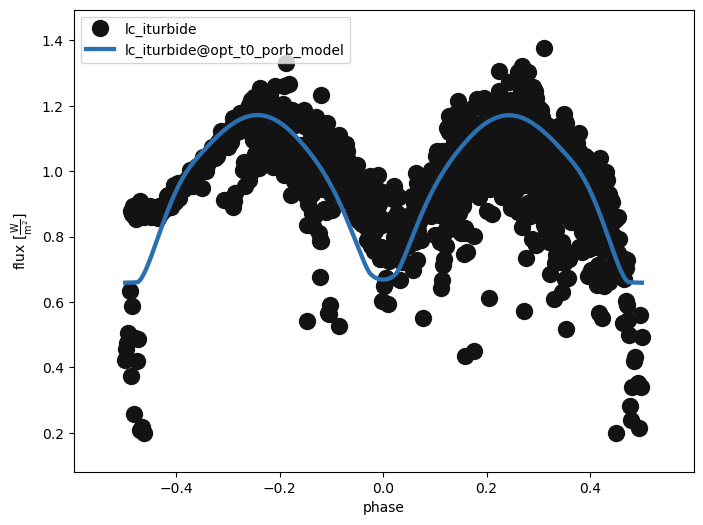

In [27]:
gen_utils.resetAtmosphere(b)
opt_utils.adopt_solution(b, 'rotsei1_t0_porb', "./external-jobs/results/opt_rotsei1_t0_porb_solution", compute='phoebe01')
# opt_utils.adopt_solution(b, 't0_porb', "./external-jobs/results/opt_rotsei1_t0_porb_solution", compute='phoebe01', run_compute=False)

In [12]:
print(b['requiv'])
print(b['sma'])
print(b['pot'])
print(b['requivratio'])
print(b['requivsumfrac'])

ParameterSet: 4 parameters
C        requiv@primary@component: 1.6410086487444842 solRad
C      requiv@secondary@component: 1.0401643607916269 solRad
        requiv@primary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 1)
      requiv@secondary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
ParameterSet: 6 parameters
C            sma@binary@component: 3.35 solRad
C           sma@primary@component: 0.8723401499841115 solRad
C         sma@secondary@component: 2.477659850015889 solRad
            sma@binary@constraint: ({requiv@primary@component} + {requiv@secondary@component}) / {requivsumfrac@binary@component}
           sma@primary@constraint: {sma@binary@component} / ((1.000000 / {q@binary@component}) + 1.000000)
         sma@secondary@constraint: {sma@binary@component} / ({q@binary@component} + 1.000000)
Parameter: pot@contact_envelope@component
   

In [14]:
b.flip_constraint(qualifier='requiv', component='primary', solve_for='pot')
b.flip_constraint(qualifier='requivratio', solve_for='requiv@primary')

<ConstraintParameter: {requiv@primary@component} = ({requivsumfrac@binary@component} * {sma@binary@component}) / ({requivratio@binary@component} + 1.000000) (solar units) => 1.6410086487444842 solRad>

In [16]:
# testing if individual optimizations are better
gen_utils.resetAtmosphere(b)

# requivsumfrac keeps causing the super low secondary mass error
	# probably shouldn't try to change it too much, could try optimizing sma@binary instead later
print(opt_utils.optimize_params(b, ['requivsumfrac'], 'rotsei1_requivsumfrac', True, compute='phoebe01'))

# FAILED AGAIN WITH SAME MASS ERROR
print(opt_utils.optimize_params(b, ['requivratio'], 'rotsei1_requivratio', True, compute='phoebe01'))

External Solver: ./external-jobs/optimizer.nelder_mead_opt_rotsei1_requivsumfrac.py ./results/opt_rotsei1_requivsumfrac_solution
('opt_rotsei1_requivsumfrac', 'opt_rotsei1_requivsumfrac_solution')
External Solver: ./external-jobs/optimizer.nelder_mead_opt_rotsei1_requivratio.py ./results/opt_rotsei1_requivratio_solution
('opt_rotsei1_requivratio', 'opt_rotsei1_requivratio_solution')


requivsumfrac@binary@orbit@component = 0.80 


ParameterSet: 1 parameters
   requivsumfrac@binary@component: 0.8003501521003316


Tue, 18 Jul 2023 15:18 BUNDLE       ERROR   Constraint 'requiv_min@primary@star@constraint' raised the following error while attempting to solve for 'requiv_min@primary@star@component'.  Consider flipping the constraint or changing the value of one of ['q@binary@orbit@component', 'sma@binary@orbit@component', 'requiv_min@primary@star@component'] until the constraint succeeds.  Original error: maximum recursion depth exceeded while calling a Python object
Tue, 18 Jul 2023 15:18 BUNDLE       ERROR   Constraint 'requiv_min@secondary@star@constraint' raised the following error while attempting to solve for 'requiv_min@secondary@star@component'.  Consider flipping the constraint or changing the value of one of ['q@binary@orbit@component', 'sma@binary@orbit@component', 'requiv_min@secondary@star@component'] until the constraint succeeds.  Original error: maximum recursion depth exceeded while calling a Python object
Tue, 18 Jul 2023 15:18 BUNDLE       ERROR   Constraint 'logg@secondary@star@

Plotting


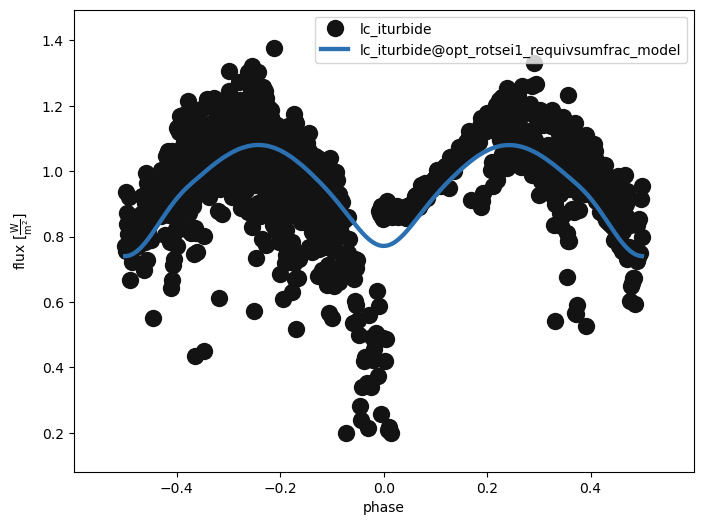

In [17]:
gen_utils.resetAtmosphere(b)
opt_utils.adopt_solution(b, 'rotsei1_requivsumfrac', "./external-jobs/results/opt_rotsei1_requivsumfrac_solution", compute='phoebe01')

In [21]:
gen_utils.saveBundle(b, "opt_rotsei1_requivsumfrac")

'bundle-saves/opt_rotsei1_requivsumfrac'

In [28]:
print(b['requivratio'])
print(b['requivsumfrac'])
print(b['sma@binary'])

Parameter: requivratio@binary@component
                       Qualifier: requivratio
                     Description: ratio between equivalent radii of children stars
                           Value: 0.6338567207354111
                  Constrained by: 
                      Constrains: None
                      Related to: requiv@primary@component, requiv@secondary@component, requivsumfrac@binary@component, sma@binary@component

Parameter: requivsumfrac@binary@component
                       Qualifier: requivsumfrac
                     Description: sum of fractional equivalent radii of children stars
                           Value: 0.7961271131202855
                  Constrained by: 
                      Constrains: None
                      Related to: requiv@primary@component, requiv@secondary@component, requivratio@binary@component, sma@binary@component

ParameterSet: 2 parameters
C            sma@binary@component: 0.0054715330566860836 solRad
            sma@binary@cons

In [24]:
# TODO: failing due to secondary mass somehow decreasing until ~0, try the different pblum_mode and see if those optimizations change anything
# TODO: also try inputting bounds to NM optimizers as priors

gen_utils.resetAtmosphere(b)
opt_utils.optimize_params(b, ['requivsumfrac', 'requivratio'], 'rotsei1_requivsumfrac_requivratio', True, compute='phoebe01')

External Solver: ./external-jobs/optimizer.nelder_mead_opt_rotsei1_requivsumfrac_requivratio.py ./results/opt_rotsei1_requivsumfrac_requivratio_solution


('opt_rotsei1_requivsumfrac_requivratio',
 'opt_rotsei1_requivsumfrac_requivratio_solution')

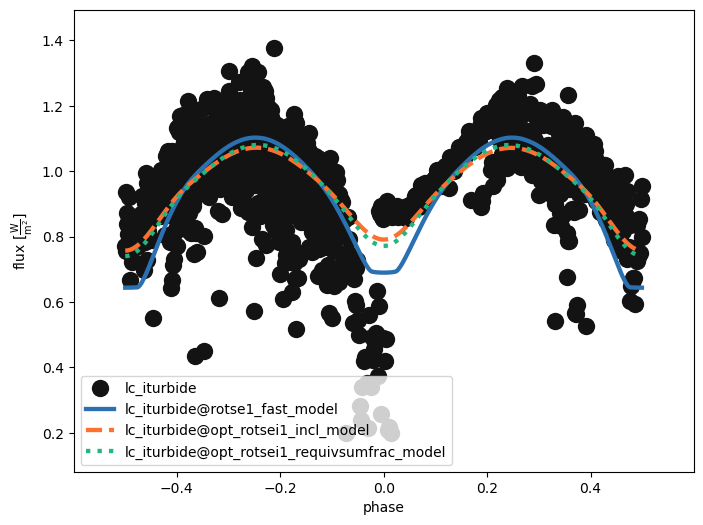

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [23]:
b.plot(x='phase', dataset='lc_iturbide', show=True, legend=True)